In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import matplotlib.pyplot as plt
import glob
import librosa
import librosa.display
from IPython.display import Audio, display
# import matplotlib.pyplot as plt

In [12]:
import soundfile as sf

### loading mp3 data

In [16]:
y, sr = librosa.load('/Users/kimmonica/Documents/alexia/speech seg/data_use /2 years old baby english talking shorts babytalk cuteconversation babyandmommy foryou love.mp3')
display(Audio(y, rate=sr))

[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


In [17]:
print(f'y:{y[:10]}')
print(f'shape y:{y.shape}')
print(f'sr: {sr}')

y:[-1.7724687e-06 -1.3588752e-05 -1.4921013e-06  1.2063419e-06
 -7.4835725e-07 -3.9046881e-08  1.6972190e-06 -8.7932749e-06
 -9.2819309e-06 -1.8937782e-05]
shape y:(315392,)
sr: 22050


### plotting Raw Audio

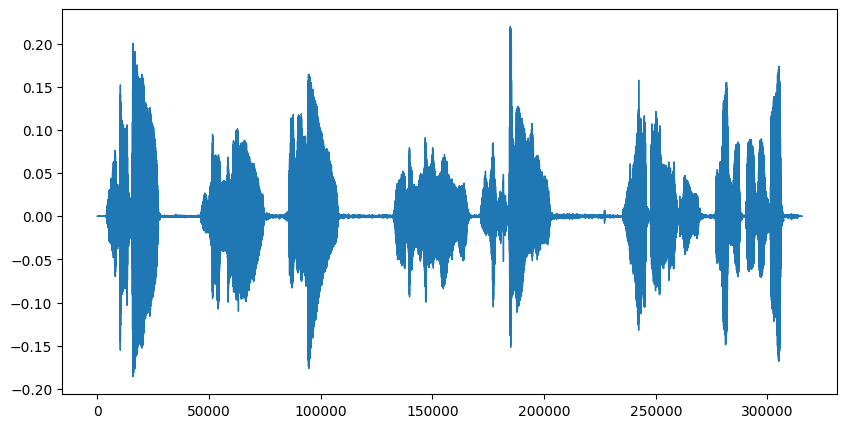

In [18]:
pd.Series(y).plot(figsize=(10,5), lw=1)
plt.show()

### Spectogram

In [19]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
print(S_db.shape)

(1025, 617)


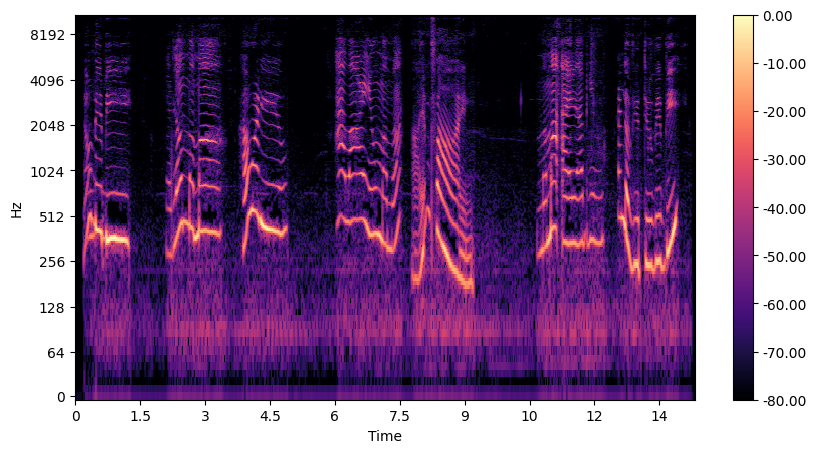

In [20]:
fig, ax = plt.subplots(figsize =(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [21]:
S_db

array([[-80.      , -75.091415, -74.28972 , ..., -69.86135 , -74.195206,
        -80.      ],
       [-80.      , -79.5453  , -80.      , ..., -77.419525, -79.386475,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

### melspectogram
#### 소리의 파형을 인간이 들을 수 있는 범위로 줄인 mel scale로 다운스케일 한 이후 그 파형을 그림으로 그린 모양

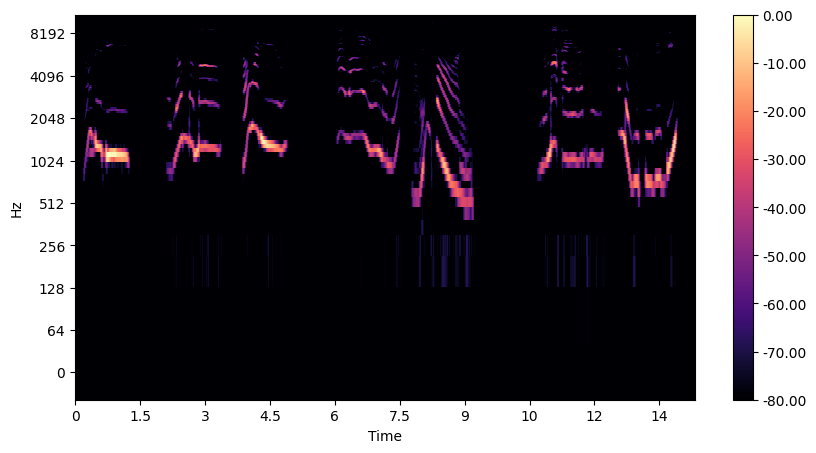

<Figure size 640x480 with 0 Axes>

In [23]:
S = librosa.feature.melspectrogram(y=y, sr = sr, n_mels =128)

S_db_mel = librosa.amplitude_to_db(S,  ref = np.max)

fig, ax = plt.subplots(figsize =(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [24]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [ ]:
from PIL import Image 
Image.fromarray(S_db_mel)

In [ ]:
plt.imshow(S_db_mel)

In [ ]:
print(S_db_mel)

### split silence

In [ ]:
audio, sr = librosa.load('/Users/kimmonica/Documents/alexia/speech seg/data_use /4-Year-Old Worship Leader Steals Steve Harveys Show!.mp3')
# display(Audio(audio, rate=sr))
n_fft = 10
S = librosa.stft(audio, n_fft= n_fft, hop_length=n_fft//2)
print(S.shape)

##convert to db
D = librosa.amplitude_to_db(np.abs(S), ref = np.max)
np.max(abs(D))

In [ ]:
nonMuteSections = librosa.effects.split(audio)
nonMuteSections

In [ ]:
from librosa import display
import librosa.display
for i in nonMuteSections:
    print(i[0])

### split by time and make dataset (input)

In [13]:
def audio_input(audio_file_path, sec):

    start_point_list = []
    end_point_list = []
    S_db_mel_list = []
    y, sr = librosa.load(audio_file_path)
    duration = int(np.trunc(librosa.get_duration(y=y, sr=sr)))
   
    start = []
    for i  in range(0,duration):
        if i % sec ==0:
            start.append(i)
    end = start[1:]
    
    for num, i in enumerate(start):
        try:
            start_point = sr*start[num]
            start_point_list.append(int(start_point/sr))
            end_point = sr*end[num]
            end_point_list.append(int(end_point/sr))
            ny = y[start_point: end_point]
            # display(Audio(ny, rate=sr))

            S = librosa.feature.melspectrogram(y=ny, sr = sr, n_mels =128)
            S_db_mel = librosa.amplitude_to_db(S,  ref = np.max)
            # img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log')            
            S_db_mel_list.append(S_db_mel)
        except:
            end_point =sr*duration
            end_point_list.append(int(end_point/sr))
            ny = y[start_point: end_point]
            # display(Audio(ny, rate=sr))

            S = librosa.feature.melspectrogram(y=ny, sr = sr, n_mels =128)
            S_db_mel = librosa.amplitude_to_db(S,  ref = np.max)
            S_db_mel_list.append(S_db_mel)

        # train_images_list=np.array(S_db_mel_list)

        
    return S_db_mel_list 

### not use def

In [4]:
def dataset_maker(S_db_mel_list, speaker):
    label_list = []
    img_list = np.array(S_db_mel_list)
    for i in range(len(img_list)):
        label_list.append(speaker)

    return img_list, label_list



In [5]:
def dataset_generator(file_path):
    ### file ###
    file_name = os.listdir(file_path)

    

    total_mel_spec_list = []
    for i in file_name:
        if '.DS_Store' == file_name:
            pass
        else:
            file_path = file_path+i
            mel_spec_list= audio_input(harvey_path+harvey_file[num],2)
            total_mel_spec_list+=mel_spec_list
        
    total_img_list, total_label_list=dataset_maker(total_mel_spec_list, 'Harvey')
    print(file_name)
    print(len(total_img_list))
    print(len(total_label_list))

    return total_img_list, total_label_list

In [6]:
def dataset_generator(file_path):
    ### file ###
    file_name = os.listdir(file_path)
    total_mel_spec_list = []
    for i in file_name:
        if '.DS_Store' == file_name:
            pass
        else:
            file_path = file_path+i
            mel_spec_list= audio_input(harvey_path+harvey_file[num],2)
            total_mel_spec_list+=mel_spec_list
        
    total_img_list, total_label_list=dataset_maker(total_mel_spec_list, 'Harvey')
    print(file_name)
    print(len(total_img_list))
    print(len(total_label_list))

    return total_img_list, total_label_list

### 자동화 따위 개나줘버려

In [4]:
from tqdm import tqdm

In [ ]:
harvey_path = '/Users/kimmonica/Documents/alexia/dataset/HARVEY/'
harvey_file = os.listdir(harvey_path)[1:] ##.DS삭제
total_mel_spec_list = []
labels_list = []
for number, name in tqdm(enumerate(harvey_file)):
        file_path = harvey_path+name
        # print(file_path)
        mel_spec_list= audio_input(file_path,2)
        total_mel_spec_list+=mel_spec_list
        print(len(total_mel_spec_list))
        # labels_list.append('ADULT')
        os.makedirs("ADULT_{}".format(number))
        for num, i in enumerate(total_mel_spec_list):
                plt.imshow(i)
                plt.axis('off')
                # plt.show()
                plt.savefig('ADULT_{}/{}_{}.png'.format(number,name,num), bbox_inches='tight',pad_inches = 0)

In [1]:
from multiprocessing import Pool

In [1]:
import os
os.cpu_count()

10

In [7]:
/pwd

'/Users/kimmonica/Documents/alexia/speech seg'

[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


KeyboardInterrupt: 

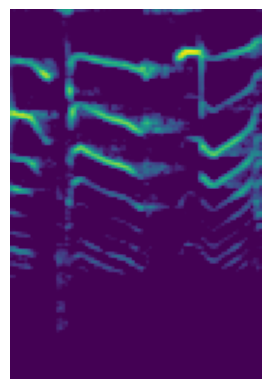

In [21]:
#manual

mel_spec_list= audio_input('/Users/kimmonica/Documents/alexia/dataset/MONO/4 Year Old Tydus TOY REVIEW!!.mp3',2)
# os.makedirs("CHILD_{}".format(5))
for num, i in enumerate(mel_spec_list):
    plt.imshow(i)
    plt.axis('off')
    # plt.show()
    plt.savefig('CHILD_{}/{}_{}.png'.format(5,'4 Year Old Tydus TOY REVIEW!!',num), bbox_inches='tight',pad_inches = 0)

In [ ]:
#manual

mel_spec_list= audio_input('/Users/kimmonica/Documents/alexia/dataset/MONO/A 12-year-old app developer  Thomas Suarez.mp3',2)
os.makedirs("CHILD_{}".format(6))
for num, i in enumerate(mel_spec_list):
    plt.imshow(i)
    plt.axis('off')
    # plt.show()
    plt.savefig('CHILD_{}/{}_{}.png'.format(6,'12-year-old app developer ',num), bbox_inches='tight',pad_inches = 0)

In [16]:
harvey_path = '/Users/kimmonica/Documents/alexia/dataset/MONO/'
harvey_file = os.listdir(harvey_path) ##.DS삭제
total_mel_spec_list = []
labels_list = []
for number, name in tqdm(enumerate(harvey_file)):
        file_path = harvey_path+name
        # print(file_path)
        try:
                mel_spec_list= audio_input(file_path,2)
                total_mel_spec_list+=mel_spec_list
                print(len(total_mel_spec_list))
                # labels_list.append('ADULT')
                os.makedirs("CHILD_{}".format(number))
                for num, i in enumerate(total_mel_spec_list):
                        plt.imshow(i)
                        plt.axis('off')
                        # plt.show()
                        plt.savefig('CHILD_{}/{}_{}.png'.format(number,name,num), bbox_inches='tight',pad_inches = 0)
        except:
                pass

0it [00:00, ?it/s][src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


93


1it [00:49, 49.44s/it][src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


123


2it [43:11, 1515.76s/it][src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


194


4it [44:39, 592.89s/it] [src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
[src/libmpg123/layer1.c:I_step_two():144] error: 465 bits needed, 57 available
[src/libmpg123/layer1.c:INT123_do_layer1():237] error: Aborting layer I decoding after step two.
Note: Illegal Audio-MPEG-Header 0x48216f42 at offset 63230.
Note: Trying to resync...
Note: Skipped 247 bytes in input.


194


In [1]:
import os
import numpy as np
harvey_path = '/Users/kimmonica/Documents/alexia/dataset/MONO/'
np.array_split(os.listdir(harvey_path), 4)

[array(['The Kid Reviews  Jurassic World.mp3',
        '5 year-old Selena Gomez Talking on the Phone w Mom.mp3',
        '.DS_Store',
        'Beekle by Dan Santat a childrens picture book review by 9-year-old MissObservation.mp3'],
       dtype='<U86'),
 array(['2 year old impersonates adults talking on the phone OMG.mp3',
        'Little Red Hot - Kid Book Review.mp3',
        'The Kid Reviews  Frozen.mp3',
        '5 year-old Selena Gomez Talking on the Phone w Mom.mp3.csv'],
       dtype='<U86'),
 array(['A 12-year-old app developer  Thomas Suarez.mp3',
        '4 Year Old Tydus TOY REVIEW!!.mp3',
        'Zooble Toy Review by a 7 Year Old Girl.mp3',
        'OMG!! 4 YEARS OLD SUPER BAKER! ZENDAYA💗.mp3'], dtype='<U86'),
 array(['Molly Wright How every child can thrive by five  TED.mp3',
        'Maddox Reviews Fidget Spinners  HiHo Kids  Kids Play.mp3',
        'Why Parents should Listen to Kids  Anyue Sun  TEDxYouth@Xujiahui.mp3',
        'The Kid Reviews  The Lego Movie.mp3'], dt

In [10]:
len(total_mel_spec_list)

1662

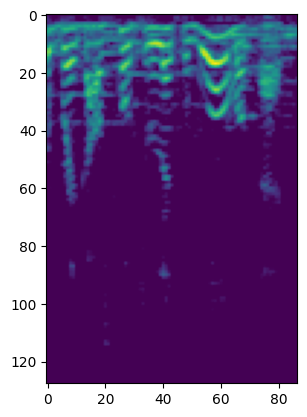

In [11]:
plt.imshow(total_mel_spec_list[399])

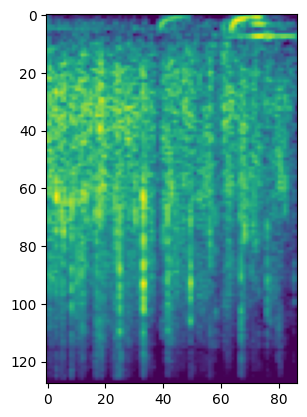

In [12]:
plt.imshow(total_mel_spec_list[-2])

In [13]:
total_mel_spec_list = total_mel_spec_list[:-1]

In [14]:
len(total_mel_spec_list)

1661

In [15]:
label_list=[]
for i in range(553):
    label_list.append('ADULT')

print(len(label_list))

for i in range(1661-553):
    label_list.append('CHILD')

print(len(label_list))

553
1661


In [16]:
print(len(label_list))

1661


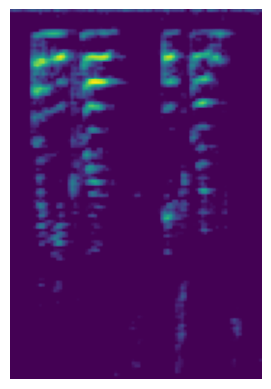

In [47]:
plt.imshow(x_train[0])
plt.axis('off')
# plt.show()
plt.savefig('tdd.png', bbox_inches='tight',pad_inches = 0)

### binary classification

In [17]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(label_list)
labels_encoded = le.transform(label_list)


In [18]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(total_mel_spec_list, labels_encoded, test_size=0.2, random_state=42, stratify=label_list)

In [28]:
/pwd

'/Users/kimmonica/Documents/alexia/speech seg'

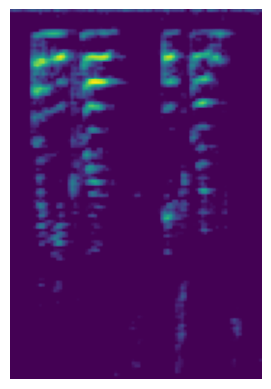

In [22]:
#딥러닝으로 들어갈때는 원핫으로 들어가야함
import numpy as np 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (333, 128) + inhomogeneous part.

import numpy as np 

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

ImportError: cannot import name 'BatchNormalization' from 'keras.layers.normalization' (/Users/kimmonica/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/normalization/__init__.py)

In [21]:
np.__version__

'1.22.4'

In [23]:
import os

'/Users/kimmonica/Documents/alexia/speech seg'

In [39]:
!python Dataframe_Multiprocess_module.py

starting multiprocessing...
8
  0%|          | 0/8 [00:00<?, ?it/s]
[src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
[src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
Note: Illegal Audio-MPEG-Header 0x761d7776 at offset 26039.
Note: Trying to resync...
Note: Skipped 13 bytes in input.
[src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
[src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
Note: Illegal Audio-MPEG-Header 0x211ad4bd at offset 26905.
Note: Trying to resync...
Note: Skipped 341 b

In [45]:
error_list = [
    '2 year old impersonates adults talking on the phone OMG.mp3',
    'Molly Wright How every child can thrive by five  TED.mp3',
    'The Kid Reviews  The Lego Movie.mp3'
    ]

In [6]:
# ERROR
!python Dataframe_Multiprocess_module.py

starting multiprocessing...
8
  0%|          | 0/8 [00:00<?, ?it/s]
[src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
[src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
Note: Illegal Audio-MPEG-Header 0x761d7776 at offset 26039.
Note: Trying to resync...
Note: Skipped 13 bytes in input.
[src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
[src/libmpg123/layer1.c:check_balloc():30] error: Illegal bit allocation value.
[src/libmpg123/layer1.c:INT123_do_layer1():228] error: Aborting layer I decoding after step one.
Note: Illegal Audio-MPEG-Header 0x211ad4bd at offset 26905.
Note: Trying to resync...
Note: Skipped 341 b